In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('fma-rock-vs-hiphop.csv')
df.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
df.shape

(17734, 21)

In [5]:
df.columns

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

<Axes: >

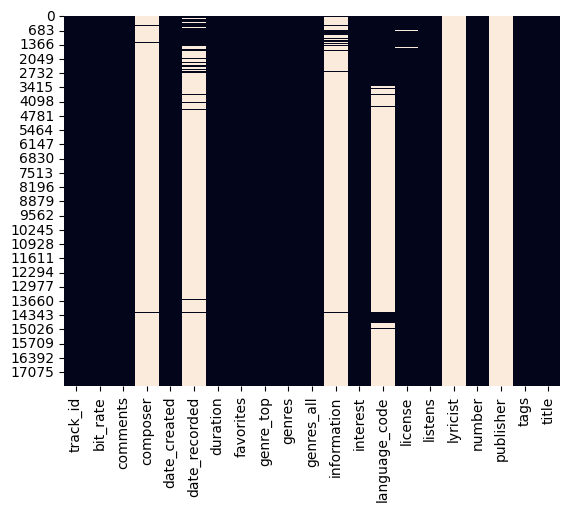

In [7]:
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df['title'].value_counts()

title
Chicken and Cheese 2 (Foot Village cover)    46
Interview                                    32
Untitled                                     29
Intro                                        25
Live at Maloe Melo                           13
                                             ..
Hey, Sol Lewitt                               1
I Am Joe                                      1
The Sleepwalker                               1
I Would Never Let You Drink Alone             1
Love In The Sky                               1
Name: count, Length: 16460, dtype: int64

In [9]:
# drop unnecessary columns and null values
df.drop(['track_id', 'comments', 'composer', 'date_created', 'date_recorded', 'information', 'license', 'language_code', 'lyricist', 'publisher', 'tags'], axis=1, inplace=True)
df

,bit_rate,duration,favorites,genre_top,genres,genres_all,interest,listens,number,title
0,256000,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,1832,0,Father's Day
1,256000,509,0,Rock,"[45, 58]","[58, 12, 45]",1948,1498,0,Peel Back The Mountain Sky
2,192000,192,0,Rock,[25],"[25, 12]",701,148,4,Untitled 04
3,192000,193,0,Rock,[25],"[25, 12]",637,98,11,Untitled 11
4,256000,405,5,Rock,[26],"[26, 12]",354,424,2,Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...
17729,320000,283,3,Hip-Hop,"[21, 811]","[811, 21]",1283,1050,4,Been On
17730,320000,250,2,Hip-Hop,"[21, 811]","[811, 21]",1077,858,2,Send Me
17731,320000,219,3,Hip-Hop,"[21, 811]","[811, 21]",1340,1142,1,The Question
17732,320000,252,6,Hip-Hop,"[21, 811]","[811, 21]",2065,1474,3,Roy


<h2>EDA</h2>

<h3> Distribution of Target Columns

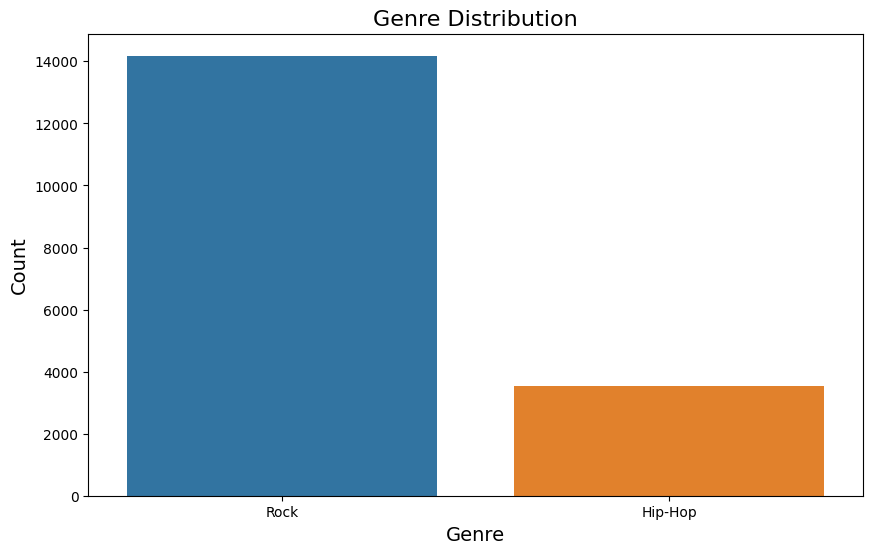

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre_top', data=df)
plt.title('Genre Distribution', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

OBSERVATION :

* Target Column is imbalanced

<h3> Let's check relations between target column with another features columns

Text(0, 0.5, 'Number')

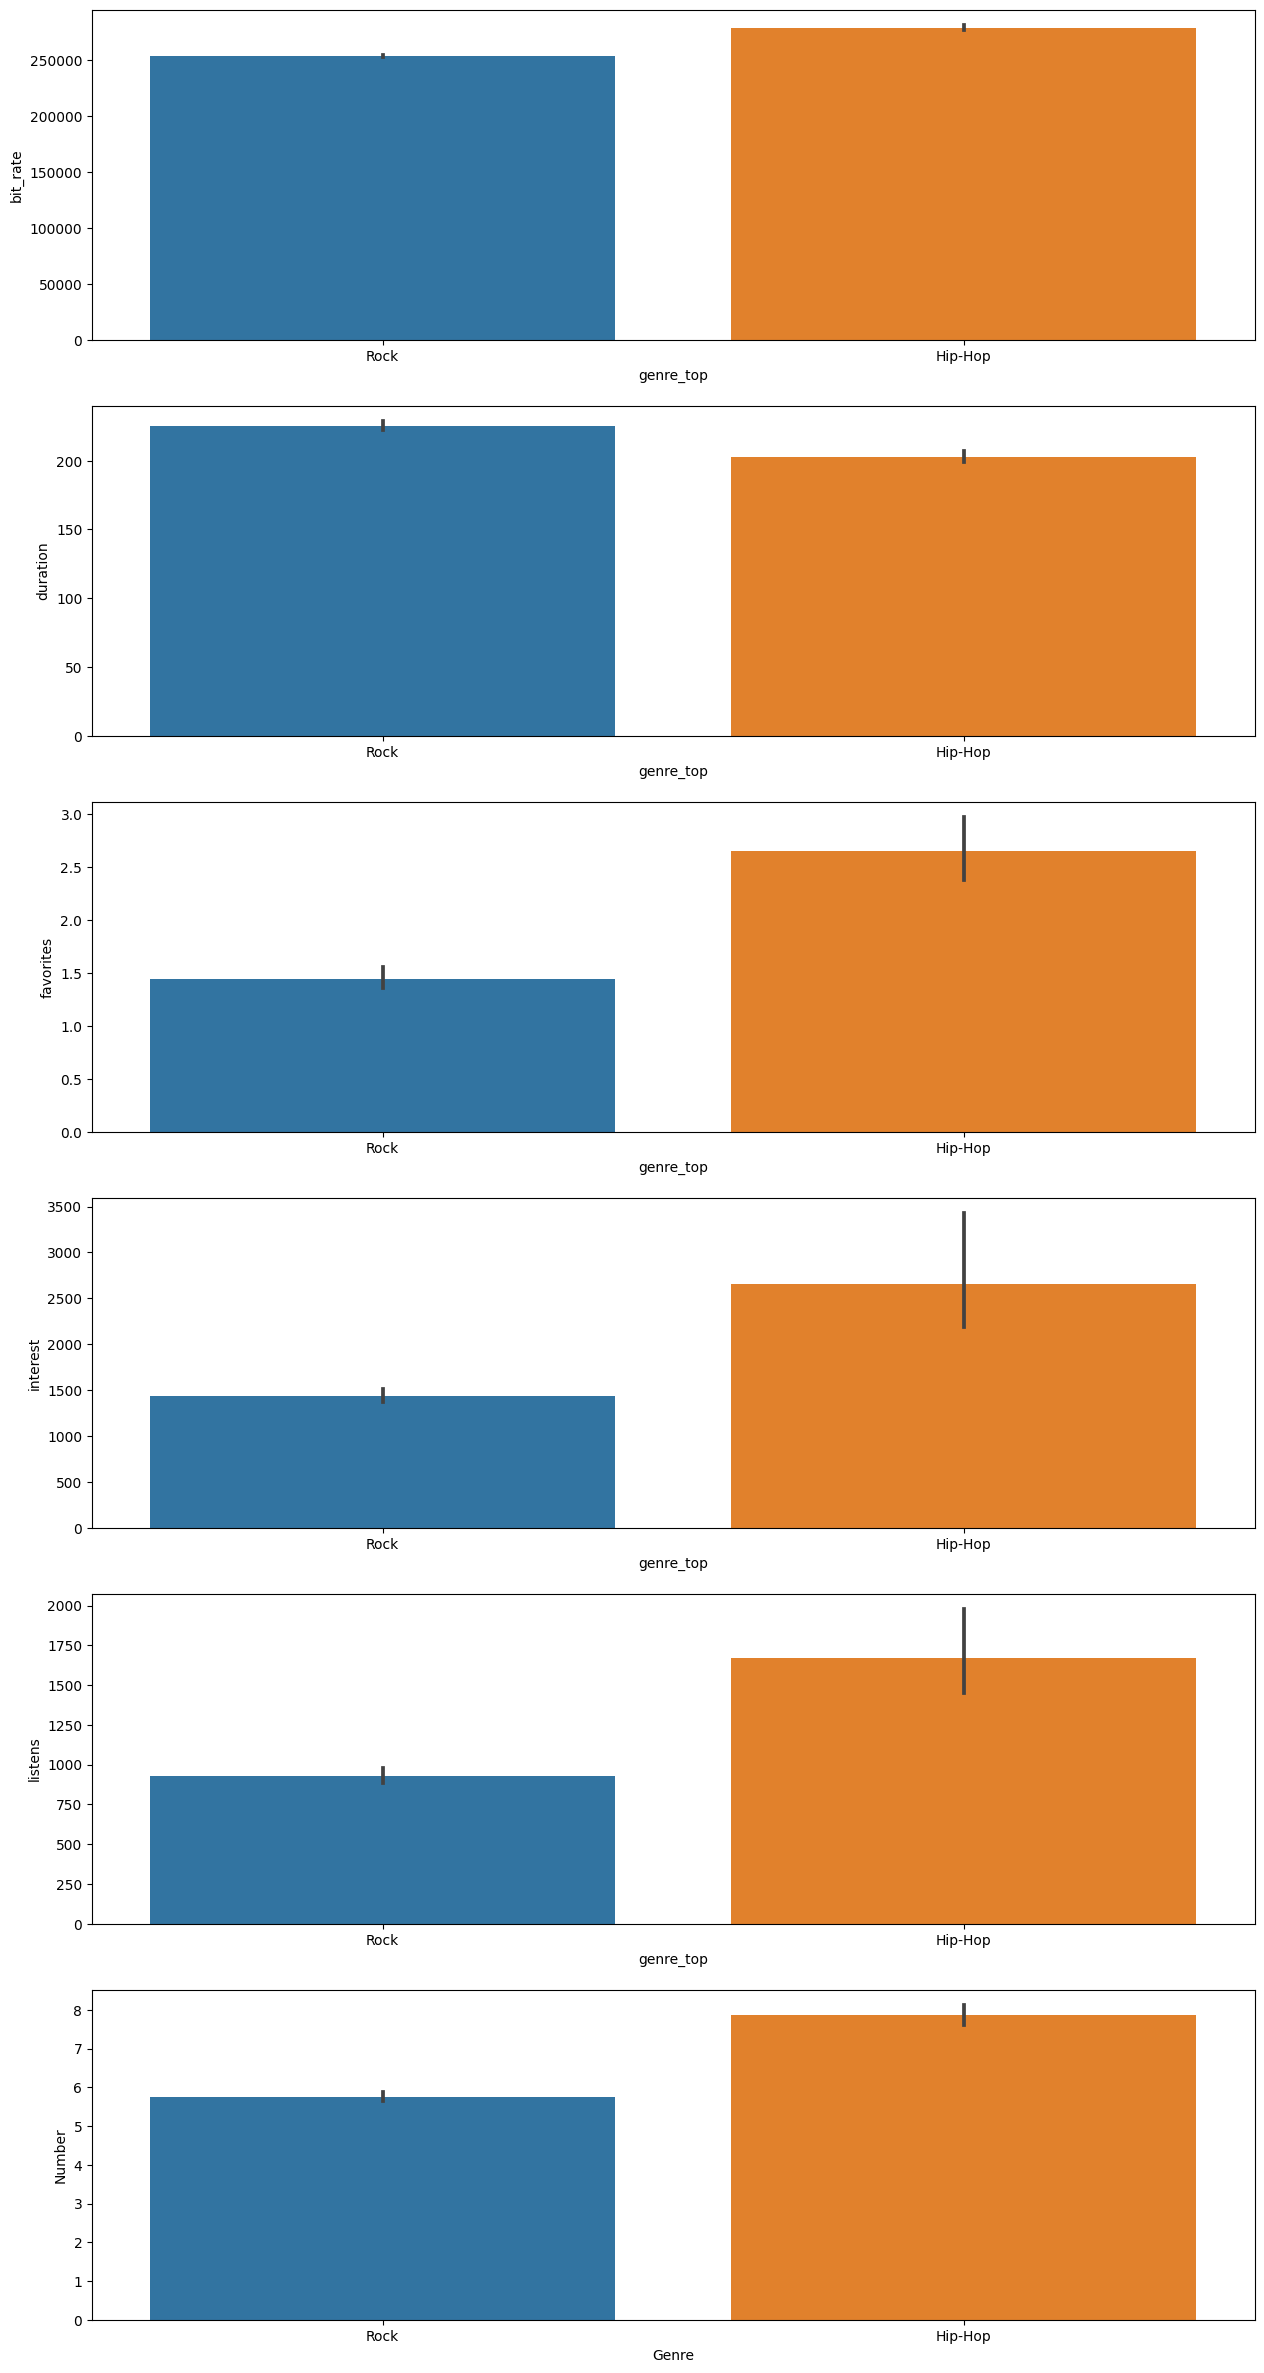

In [11]:
fig, ax = plt.subplots(6, 1, figsize=(15, 30))
sns.barplot(data=df, x='genre_top', y='bit_rate', ax=ax[0])
plt.xlabel('Genre')
plt.ylabel('Bit Rate')
sns.barplot(data=df, x='genre_top', y='duration', ax=ax[1])
plt.xlabel('Genre')
plt.ylabel('Duration')
sns.barplot(data=df, x='genre_top', y='favorites', ax=ax[2])
plt.xlabel('Genre')
plt.ylabel('Favorites')
sns.barplot(data=df, x='genre_top', y='interest', ax=ax[3])
plt.xlabel('Genre')
plt.ylabel('Interest')
sns.barplot(data=df, x='genre_top', y='listens', ax=ax[4])
plt.xlabel('Genre')
plt.ylabel('Listens')
sns.barplot(data=df, x='genre_top', y='number', ax=ax[5])
plt.xlabel('Genre')
plt.ylabel('Number')



OBSERTVATION :

* as we see, hip-hop music is more popular than rock
* duration of rock music is bit longer than hip-hop music
* bitrate of hip-hop music is bit larger than rock music

<h3> CHECK OUTLIER

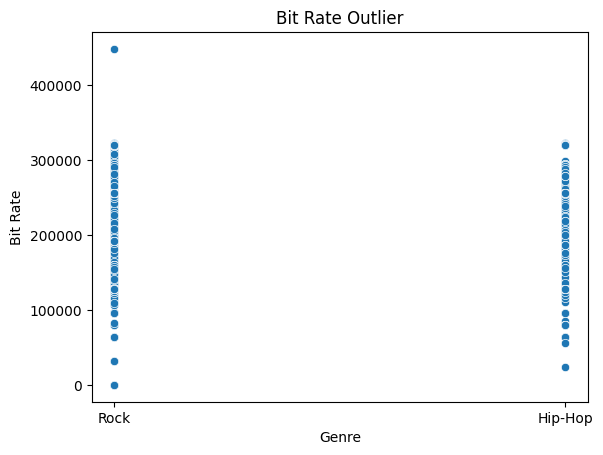

In [12]:
# outlier in bit_rate
sns.scatterplot(data=df, x='genre_top', y='bit_rate')
plt.xlabel('Genre')
plt.ylabel('Bit Rate')
plt.title('Bit Rate Outlier')
plt.show()

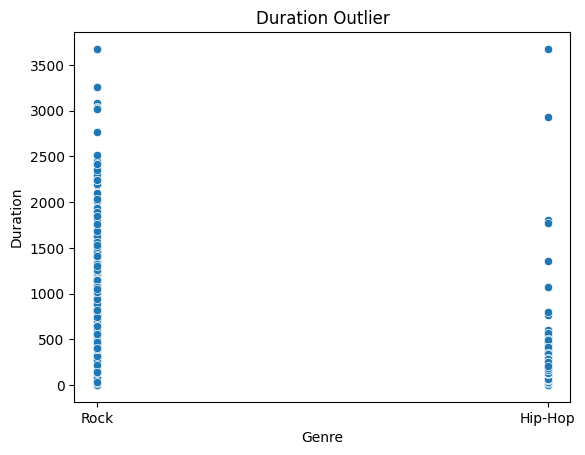

In [13]:
# outlier in duration
sns.scatterplot(data=df, x='genre_top', y='duration')
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.title('Duration Outlier')
plt.show()

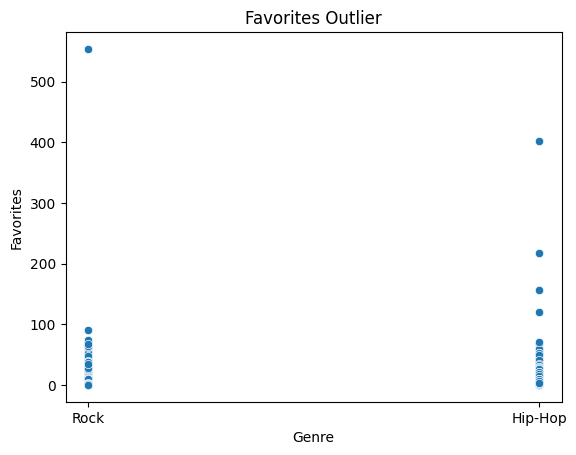

In [14]:
# outlier in favorites
sns.scatterplot(data=df, x='genre_top', y='favorites')
plt.xlabel('Genre')
plt.ylabel('Favorites')
plt.title('Favorites Outlier')
plt.show()


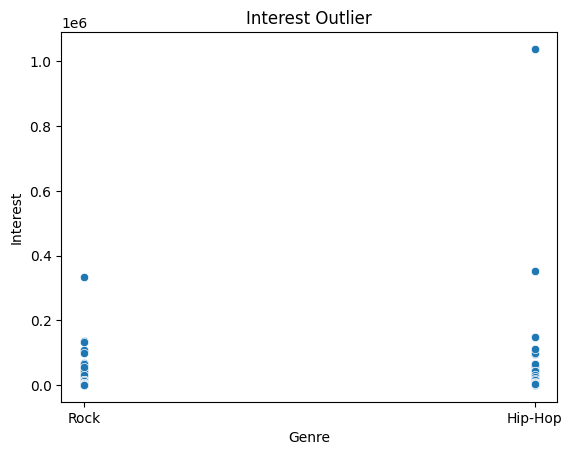

In [15]:
# outlier in interest
sns.scatterplot(data=df, x='genre_top', y='interest')
plt.xlabel('Genre')
plt.ylabel('Interest')
plt.title('Interest Outlier')
plt.show()


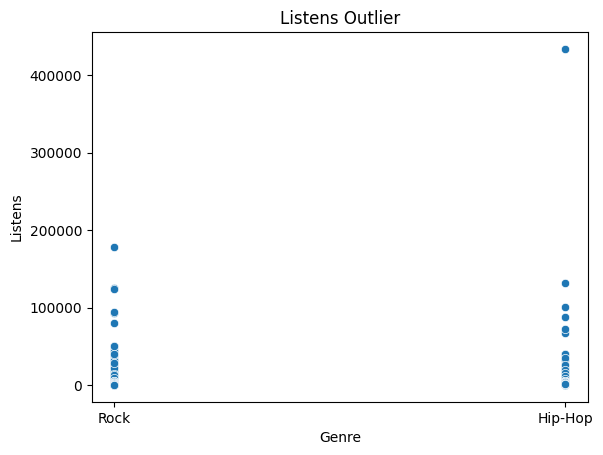

In [16]:
# outlier in listens
sns.scatterplot(data=df, x='genre_top', y='listens')
plt.xlabel('Genre')
plt.ylabel('Listens')
plt.title('Listens Outlier')
plt.show()

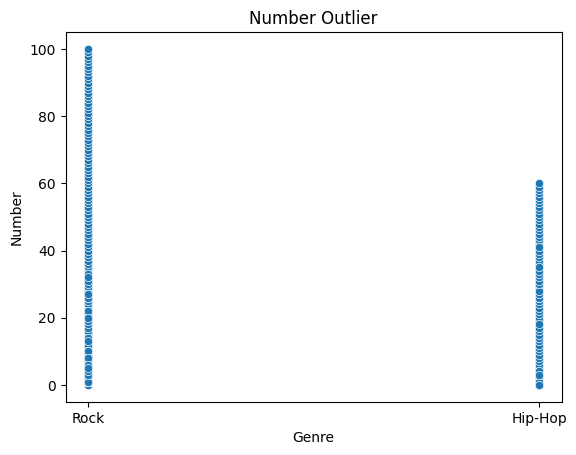

In [17]:
# outlier in number
sns.scatterplot(data=df, x='genre_top', y='number')
plt.xlabel('Genre')
plt.ylabel('Number')
plt.title('Number Outlier')
plt.show()

OBSERVATION :
* We have found a much outliers in the features columns

<h2> BASELINE MODELING

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bit_rate    17734 non-null  int64 
 1   duration    17734 non-null  int64 
 2   favorites   17734 non-null  int64 
 3   genre_top   17734 non-null  object
 4   genres      17734 non-null  object
 5   genres_all  17734 non-null  object
 6   interest    17734 non-null  int64 
 7   listens     17734 non-null  int64 
 8   number      17734 non-null  int64 
 9   title       17734 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.4+ MB


In [19]:
scaler = StandardScaler()

df['bit_rate'] = scaler.fit_transform(df[['bit_rate']])
df['duration'] = scaler.fit_transform(df[['duration']])
df['favorites'] = scaler.fit_transform(df[['favorites']])
df['interest'] = scaler.fit_transform(df[['interest']])
df['listens'] = scaler.fit_transform(df[['listens']])
df['number'] = scaler.fit_transform(df[['number']])
df

,bit_rate,duration,favorites,genre_top,genres,genres_all,interest,listens,number,title
0,-0.048289,3.462905,-0.254214,Rock,"[45, 58]","[58, 12, 45]",0.085768,0.160288,-0.874096,Father's Day
1,-0.048289,1.619191,-0.254214,Rock,"[45, 58]","[58, 12, 45]",0.028714,0.089124,-0.874096,Peel Back The Mountain Sky
2,-1.088366,-0.162691,-0.254214,Rock,[25],"[25, 12]",-0.104020,-0.198516,-0.308714,Untitled 04
3,-1.088366,-0.157069,-0.254214,Rock,[25],"[25, 12]",-0.110832,-0.209170,0.680704,Untitled 11
4,-0.048289,1.034599,0.500023,Rock,[26],"[26, 12]",-0.140956,-0.139710,-0.591405,Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...
17729,0.991788,0.348828,0.198329,Hip-Hop,"[21, 811]","[811, 21]",-0.042070,-0.006330,-0.308714,Been On
17730,0.991788,0.163332,0.047481,Hip-Hop,"[21, 811]","[811, 21]",-0.063998,-0.047239,-0.591405,Send Me
17731,0.991788,-0.010921,0.198329,Hip-Hop,"[21, 811]","[811, 21]",-0.036003,0.013272,-0.732751,The Question
17732,0.991788,0.174574,0.650871,Hip-Hop,"[21, 811]","[811, 21]",0.041168,0.084010,-0.450060,Roy


In [20]:
encoder = LabelEncoder()
df['genre_top'] = encoder.fit_transform(df['genre_top'])
df['genres'] = encoder.fit_transform(df['genres'])
df['genres_all'] = encoder.fit_transform(df['genres_all'])
df['title'] = encoder.fit_transform(df['title'])

df

,bit_rate,duration,favorites,genre_top,genres,genres_all,interest,listens,number,title
0,-0.048289,3.462905,-0.254214,1,264,168,0.085768,0.160288,-0.874096,4649
1,-0.048289,1.619191,-0.254214,1,264,168,0.028714,0.089124,-0.874096,10144
2,-1.088366,-0.162691,-0.254214,1,162,80,-0.104020,-0.198516,-0.308714,14477
3,-1.088366,-0.157069,-0.254214,1,162,80,-0.110832,-0.209170,0.680704,14483
4,-0.048289,1.034599,0.500023,1,181,117,-0.140956,-0.139710,-0.591405,6221
...,...,...,...,...,...,...,...,...,...,...
17729,0.991788,0.348828,0.198329,0,98,227,-0.042070,-0.006330,-0.308714,1525
17730,0.991788,0.163332,0.047481,0,98,227,-0.063998,-0.047239,-0.591405,11554
17731,0.991788,-0.010921,0.198329,0,98,227,-0.036003,0.013272,-0.732751,13553
17732,0.991788,0.174574,0.650871,0,98,227,0.041168,0.084010,-0.450060,11200


In [21]:
X = df.drop('genre_top', axis=1)
y = df['genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['genre_top'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14187, 9), (3547, 9), (14187,), (3547,))

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00      2837

    accuracy                           1.00      3547
   macro avg       1.00      1.00      1.00      3547
weighted avg       1.00      1.00      1.00      3547



<Axes: >

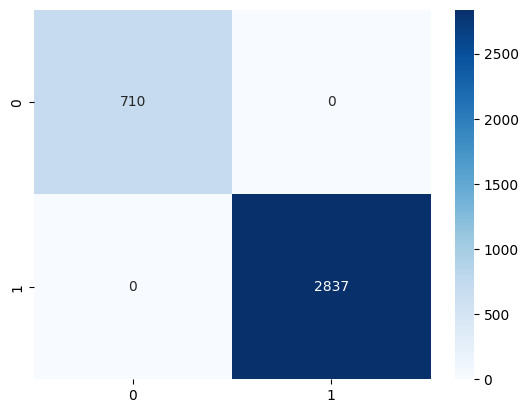

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')

The baseline model accuracy is already best! It's happened because is clear enough where is hip-hop music or rock music if we identify using popularity of both.

<h3> Let's did features importance to make sure which features are have big impact in model

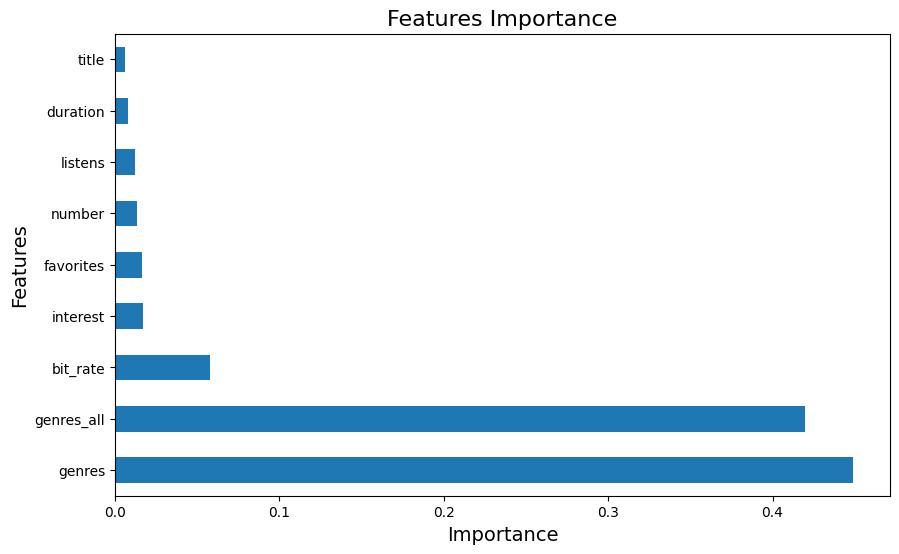

In [23]:
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Features Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

<h3> Use the top 3 feature to create new model, I'm sure the model would be have same great result!

In [33]:
X = df[['genres', 'genres_all', 'bit_rate']]
y = df['genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['genre_top'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14187, 3), (3547, 3), (14187,), (3547,))

Accuracy Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00      2837

    accuracy                           1.00      3547
   macro avg       1.00      1.00      1.00      3547
weighted avg       1.00      1.00      1.00      3547



<Axes: >

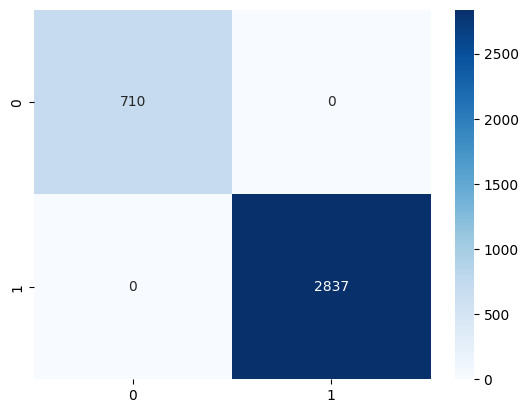

In [34]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')

<h3> Check using features that have less impact

In [36]:
X = df[['title', 'duration', 'interest', 'listens', 'number', 'favorites']]
y = df['genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['genre_top'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14187, 6), (3547, 6), (14187,), (3547,))

Accuracy Score:  0.8116718353538201
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.21      0.31       710
           1       0.83      0.96      0.89      2837

    accuracy                           0.81      3547
   macro avg       0.71      0.59      0.60      3547
weighted avg       0.78      0.81      0.77      3547



<Axes: >

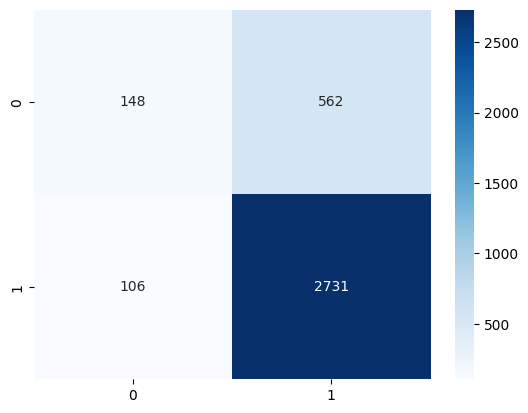

In [37]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')

<h1> IS DONE!